# Importing

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:

df = pd.read_csv('C:\\Users\\SAHITHI\\Downloads\\train.csv\\train.csv')

In [5]:
# Dropping id column
df = df.drop('id', axis=1)

In [6]:
df.shape

(15289, 17)

In [7]:
df.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


# Exploratory Data Analysis

<AxesSubplot:>

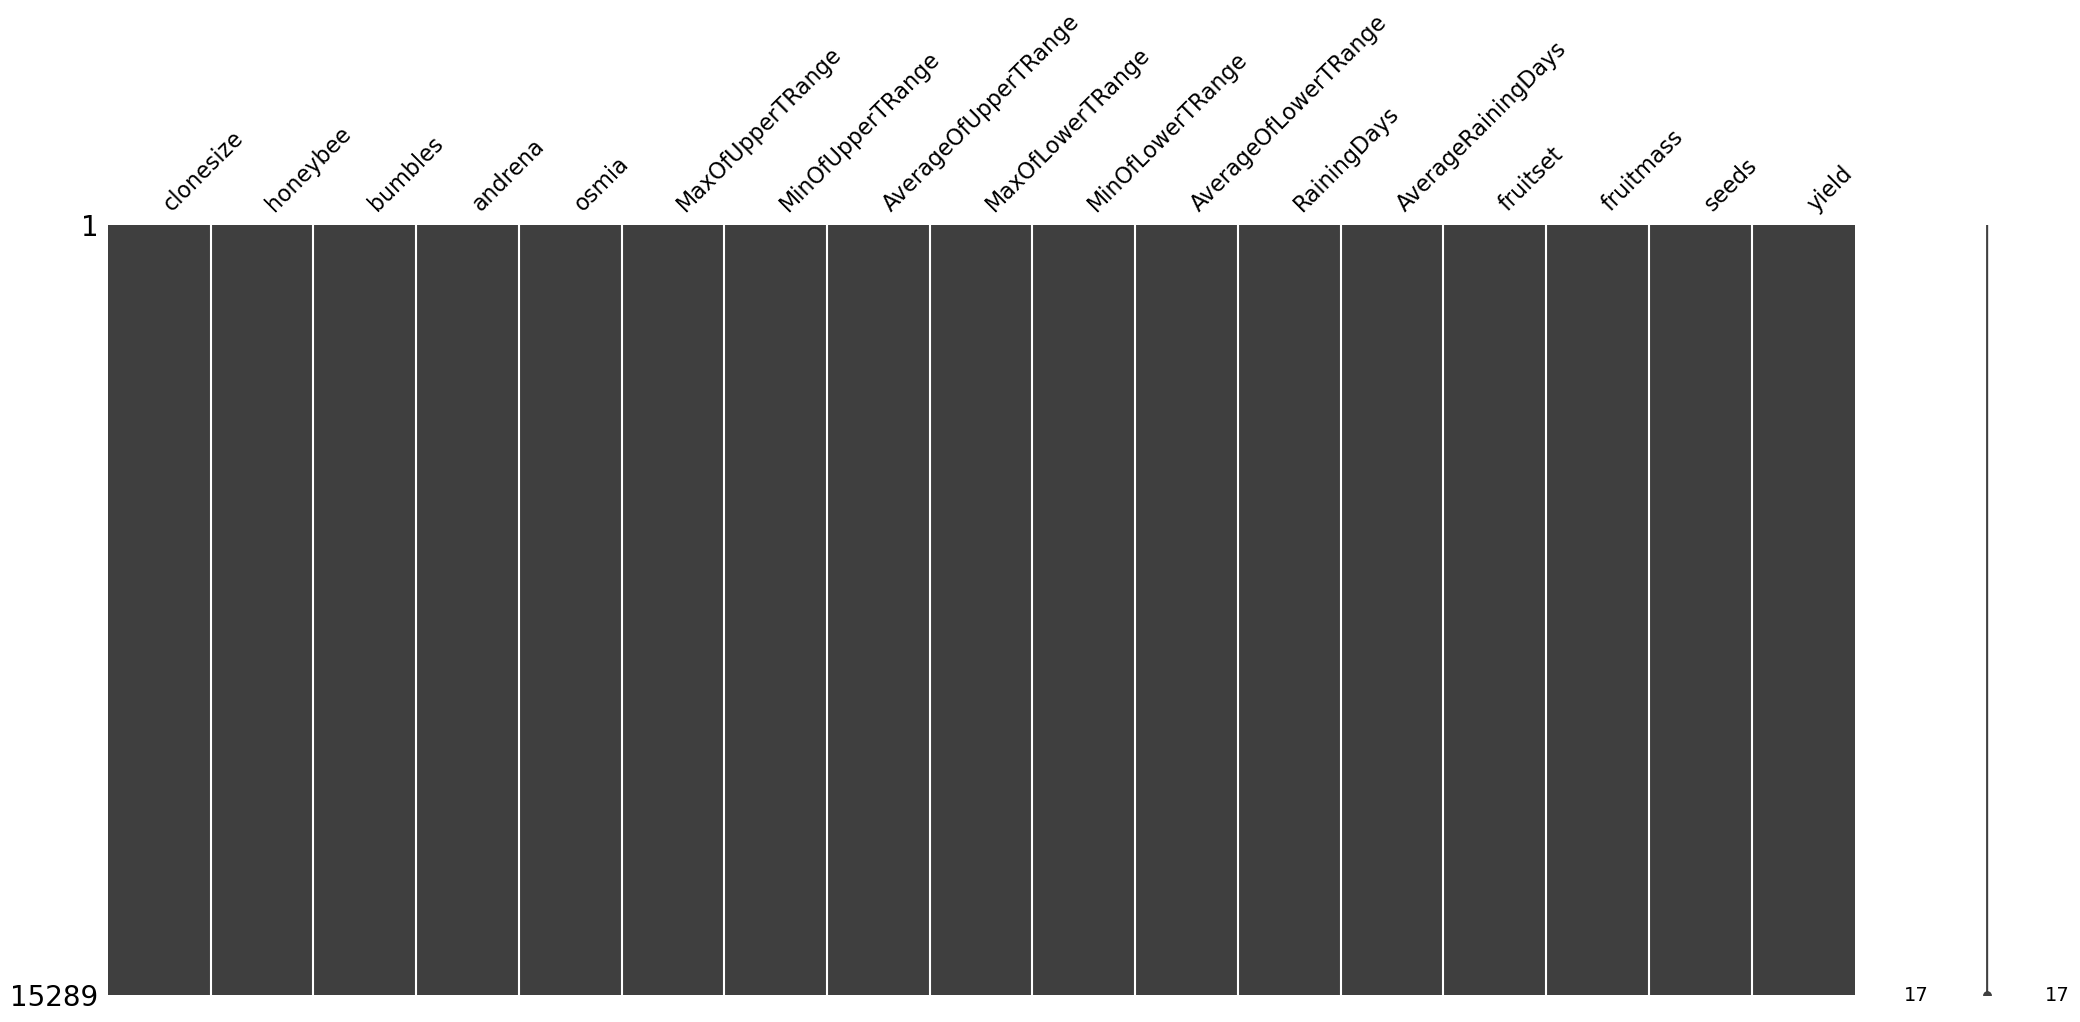

In [8]:
# Visualizing missing values if any
msno.matrix(df)

In [9]:
# Printing number of missing values if any
df.isnull().sum() / df.shape[0]

clonesize               0.0
honeybee                0.0
bumbles                 0.0
andrena                 0.0
osmia                   0.0
MaxOfUpperTRange        0.0
MinOfUpperTRange        0.0
AverageOfUpperTRange    0.0
MaxOfLowerTRange        0.0
MinOfLowerTRange        0.0
AverageOfLowerTRange    0.0
RainingDays             0.0
AverageRainingDays      0.0
fruitset                0.0
fruitmass               0.0
seeds                   0.0
yield                   0.0
dtype: float64

**<span style='color:red'>No mssing values!</span>**

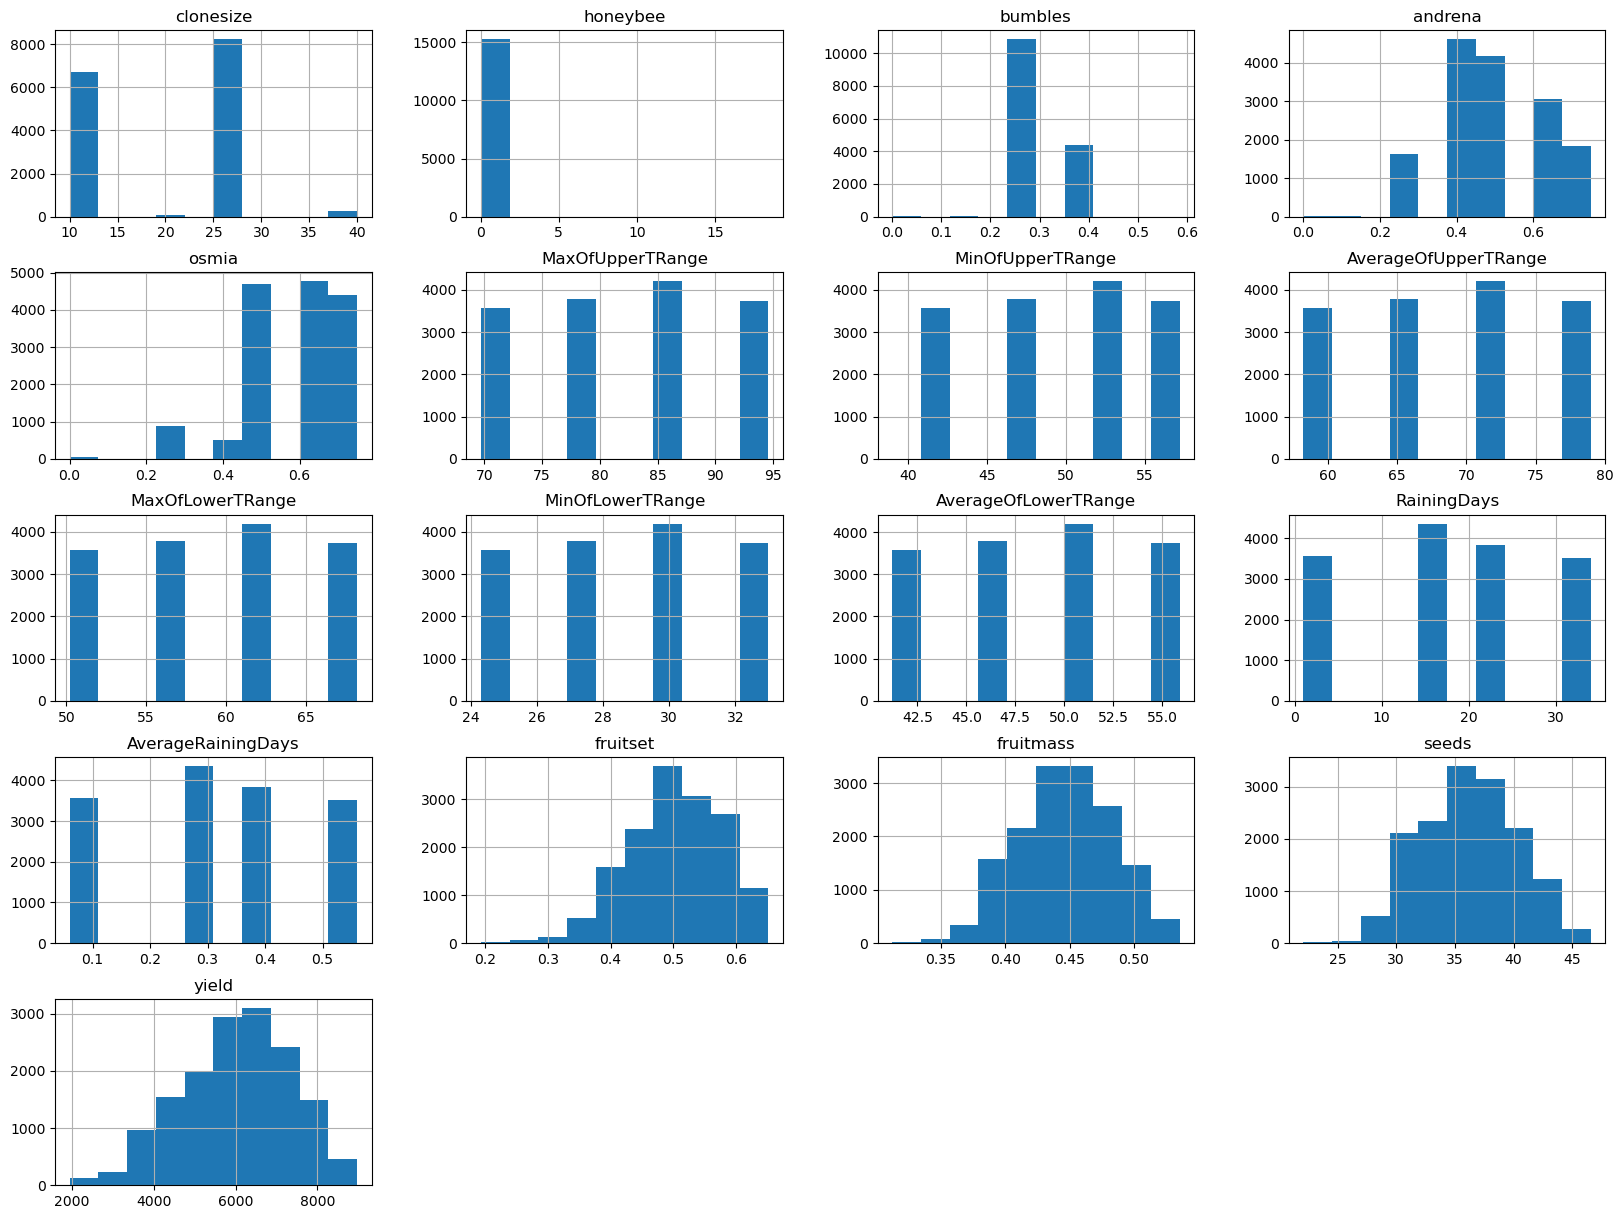

In [10]:
df.hist(bins=10, figsize=(20,15))
plt.show()

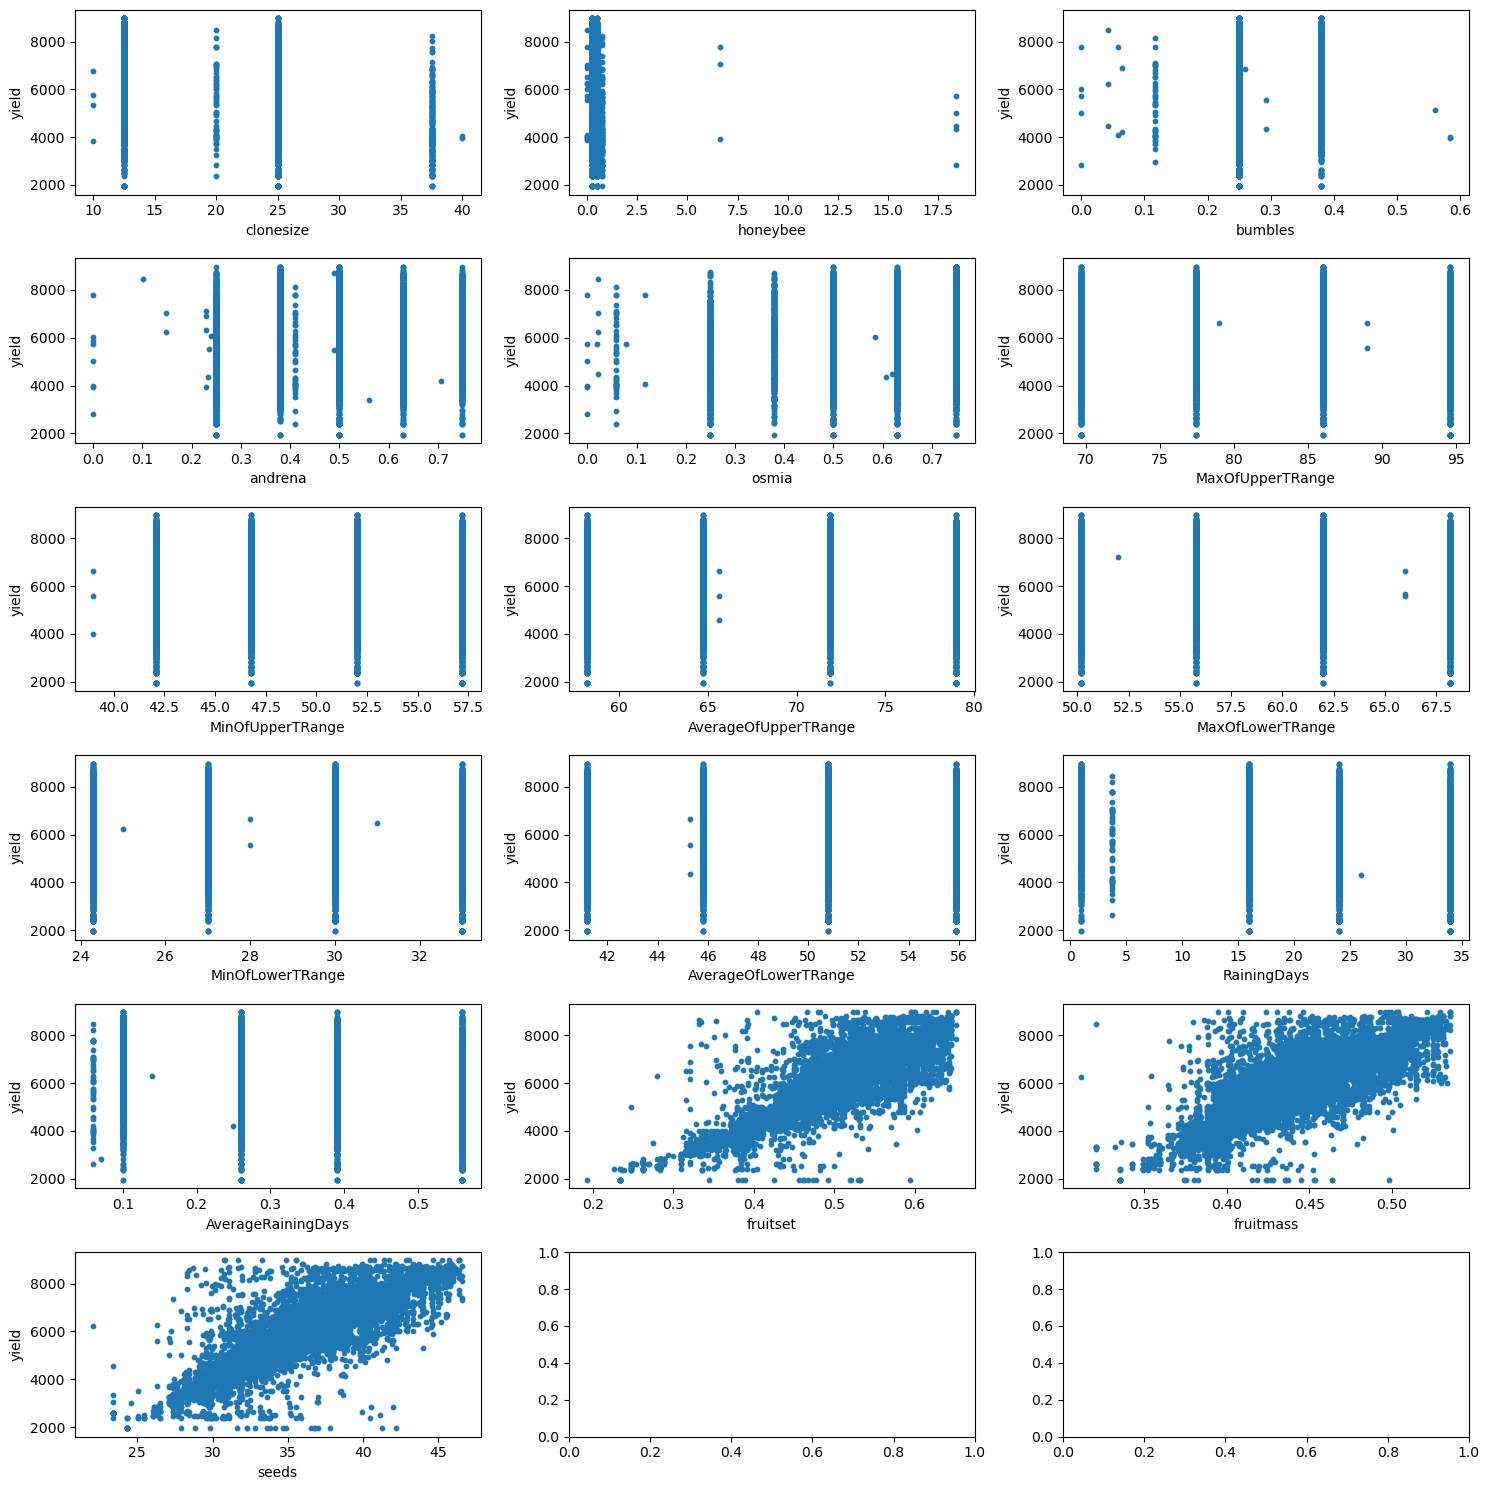

In [11]:
import matplotlib.pyplot as plt

# assuming df is your dataframe
target = 'yield'
num_cols = df.shape[1] - 1
num_rows = (num_cols - 1) // 3 + 1
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 15))
axs = axs.flatten()

for i, col in enumerate(df.columns):
    if col != target:
        axs[i].scatter(df[col], df[target], s=10)
        axs[i].set_xlabel(col)
        axs[i].set_ylabel(target)
plt.tight_layout()
plt.show()


**<span style='color:red'>All features are quantative and not very skewed. I will quantile transform these features (except target - yield) and then scale to range between 0 and 1 using min-max scaling for efficient trainning of models.</span>**

In [12]:
df.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


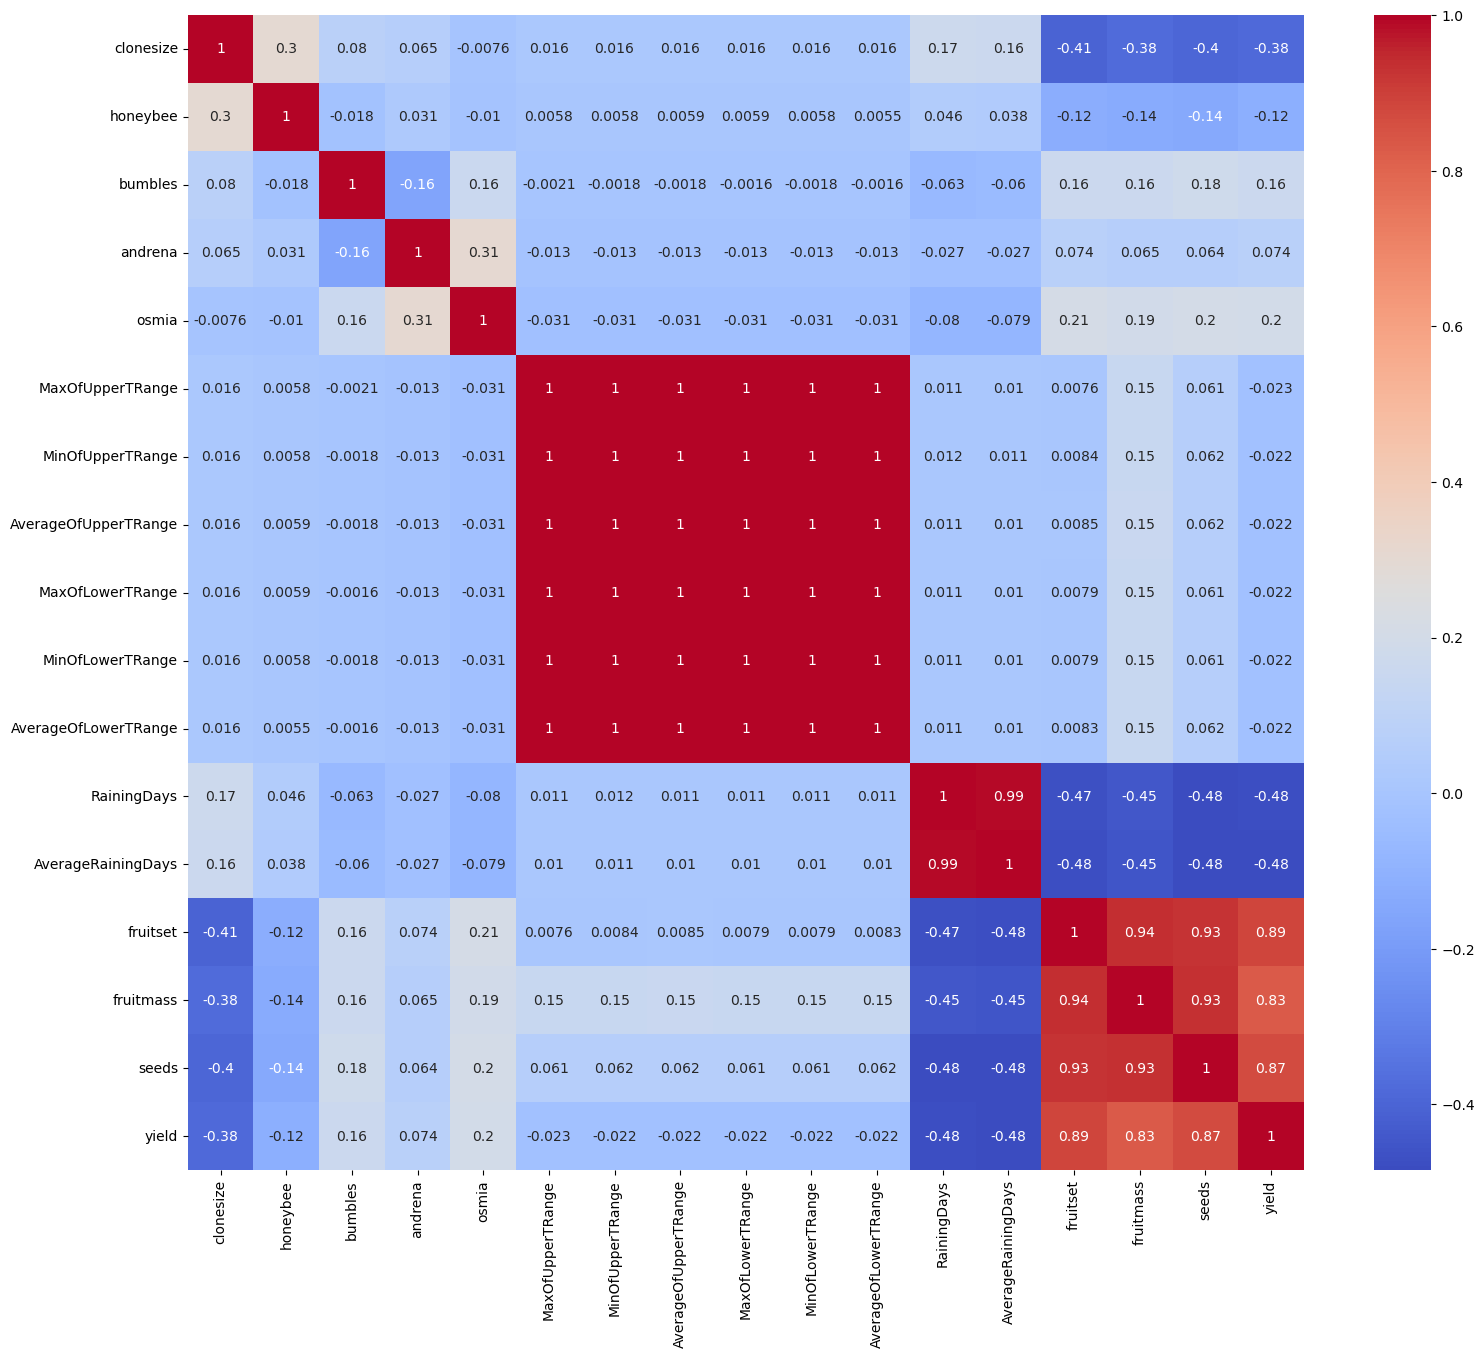

In [13]:
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**<span style='color:red'>The features 'clonesize', 'RainingDays', and 'AverageRainingDays' exhibit a high negative correlation with the target variable 'yield', while 'honeybee' has a slightly weaker negative correlation.</span>**

**<span style='color:red'>On the other hand, 'fruitset', 'fruitmass', and 'seeds' are very highly positively correlated with 'yield', while 'bumbles' and 'osmia' have moderate positive correlations.</span>**

# Transforming data

In [14]:
# Creating independent features df
X = df.loc[:, 'clonesize':'seeds']
X.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512


In [15]:
X.shape

(15289, 16)

In [16]:
# Seperating target feature
y = df['yield']
y.head()

0    4476.81146
1    5548.12201
2    6869.77760
3    6880.77590
4    7479.93417
Name: yield, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating base models & selecting

**The competition will evaluate submissions based on Mean Absolute Error (MAE). So, I'll use the same for evaluating my models.**

In [18]:
'''Linear Regression'''

LinearRegression_pipeline = Pipeline([
    ('quantile_transformer', QuantileTransformer()),
    ('linear_regression', LinearRegression())
])

# training the pipeline on the training set
LinearRegression_pipeline.fit(X_train, y_train)

# predicting on the testing set
y_pred = LinearRegression_pipeline.predict(X_test)

# evaluating the performance using MAE
mae = mean_absolute_error(y_test, y_pred)

print("LinearRegression MAE:", mae)

LinearRegression MAE: 407.96460639015316


In [19]:
'''XGBRegressor'''

# specifing the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # specify the objective function
    'eval_metric': 'mae',  # specify the evaluation metric
    'tree_method': 'hist',  # use GPU to build trees
    #'gpu_id': 0  # specify the GPU device to use
}

# creating an XGBoost regressor
xgb_model = xgb.XGBRegressor(**params)

# fitting the model on the training data
xgb_model.fit(X_train, y_train)

# predicting on the test data
y_pred = xgb_model.predict(X_test)

# evaluating the model using MAE
mae = mean_absolute_error(y_test, y_pred)
print("XGBRegressor MAE:", mae)

XGBRegressor MAE: 368.0672091262161


In [20]:
'''Decision Tree'''

# Creating a decision tree regressor
tree = DecisionTreeRegressor(random_state=42)

# Fitting the model on the training data
tree.fit(X_train, y_train)

# Making predictions on the test data
y_pred = tree.predict(X_test)

# Evaluating the model using mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("DecisionTreeRegressor MAE:", mae)

DecisionTreeRegressor MAE: 523.2453688358405


In [21]:
'''Random Forest'''

RandomForestRegressor_pipeline = make_pipeline(
    QuantileTransformer(),
    RandomForestRegressor()
)

# Fit the pipeline on the training data
RandomForestRegressor_pipeline.fit(X_train, y_train)

# Predict on the testing data
y_pred = RandomForestRegressor_pipeline.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("RandomForestRegressor MAE:", mae)

RandomForestRegressor MAE: 363.2087344472783


In [22]:
'''Support Vector Regression (SVR)'''

SVR_pipeline = Pipeline([
    ('quantile_transformer', QuantileTransformer()),
    ('regressor', SVR())
])

# Fit the pipeline on the training data
SVR_pipeline.fit(X_train, y_train)

# Predict on the testing data
y_pred = SVR_pipeline.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("SVR MAE:", mae)

SVR MAE: 715.2900188949636


In [23]:
'''Neural network'''

NN_pipeline = Pipeline([
    ('transformer', QuantileTransformer()),
    ('estimator', MLPRegressor(learning_rate_init=0.06))
])

# Fitting the pipeline on the training data
NN_pipeline.fit(X_train, y_train)

# Predict on the testing data
y_pred = NN_pipeline.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Neural Network MAE:", mae)

Neural Network MAE: 405.01683031172615


**<span style='color:red'>XGBRegressor and RandomForestRegressor base models have best MAE score out of all other models created. So, well use ths 2 model and performhyperparameter tuning to find the best model.</span>**

# Hyperparameter tuning XGBRegressor

In [24]:
# params = {
#     'n_estimators': [150, 175, 200, 225, 250],
#     'max_depth': [3, 4, 5, 6, 7],
#     'learning_rate': [0.01, 0.025, 0.05, 0.1, 0.2],
#     'min_child_weight': [1, 2, 3, 4, 5],
#    'subsample' : [0.6, 0.62, 0.64, 0.66, 0.68]
# }

 # specifing the parameters for XGBoost
# params = {
#     'eval_metric': 'mae',  # specify the evaluation metric
#     'tree_method': 'hist',  # use GPU to build trees
#     #'gpu_id': 0  # specify the GPU device to use
# }

 # creating an XGBoost regressor
# xgb_regressor = xgb.XGBRegressor(**params)
   

# random_cv = RandomizedSearchCV(estimator=xgb_regressor,
#param_distributions=hyperparameter_grid,
#             cv=5, n_iter=20,
#             scoring = 'neg_mean_absolute_error',n_jobs = 4,
#              verbose = 2, 
#             return_train_score = True,
#             random_state=42)

# random_cv.fit(X_train,y_train)
# random_cv.best_estimator_ 

**Performing manual hyperparameter tuning**

In [25]:
# specifing the parameters for XGBoost
params = {
    'max_bin' : 1000,
    'eval_metric': 'mae',  # specify the evaluation metric
    'tree_method': 'hist',  # use GPU to build trees
    'predictor' : 'cpu_predictor',
    'n_estimators': 179,
    'max_depth': 5,
    'learning_rate': 0.03921, #changed from 0.03811 to 0.04
    'min_child_weight': 5,
    'subsample' : 0.500, #changed from 0.623 to 0.500 to 0.700
    'num_parallel_tree' : 1
}


# creating an XGBoost regressor
xgb_model = xgb.XGBRegressor(**params)




# fitting the model on the training data
xgb_model.fit(X_train, y_train)

# predicting on the test data
y_pred = xgb_model.predict(X_test)

# evaluating the model using MAE
mae = mean_absolute_error(y_test, y_pred)
print("XGBRegressor MAE:", mae)

XGBRegressor MAE: 346.01422327044327


# Predicting test data

In [26]:
test_df = pd.read_csv('C:\\Users\\SAHITHI\\Downloads\\test.csv\\test.csv')

# Dropping id column
test_df = test_df.drop('id', axis=1)

test_df.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [27]:
test_df.shape

(10194, 16)

In [28]:
test_predictions = xgb_model.predict(test_df)
test_predictions.shape

(10194,)

In [29]:
test_predictions

array([4274.791 , 6128.981 , 7179.874 , ..., 6532.93  , 4423.4263,
       7284.0493], dtype=float32)

# Submission

In [32]:
submission = pd.read_csv('C:\\Users\\SAHITHI\\Downloads\\Machine Learning Project\\sample_submission.csv')
submission.head()

,id,yield
0,15289,6025.194
1,15290,6025.194
2,15291,6025.194
3,15292,6025.194
4,15293,6025.194


In [33]:
submission['yield'] = test_predictions
submission.head()

,id,yield
0,15289,4274.791016
1,15290,6128.980957
2,15291,7179.874023
3,15292,4707.099609
4,15293,3695.780518


In [34]:
# Saving
submission.to_csv('submission.csv', index=False)